<a href="https://colab.research.google.com/github/mathgds/introducao_a_ciencia_de_dados/blob/main/02_basic_linear_regression_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introdução
Este notebook fornece uma introdução à regressão linear. Vamos criar um conjunto de dados sintético, ajustar um modelo de regressão linear e avaliar seu desempenho.

## 2. Importando Bibliotecas

* **from sklearn.linear_model import LinearRegression:** Importa a classe LinearRegression do módulo linear_model da biblioteca scikit-learn (sklearn). A scikit-learn é uma biblioteca amplamente utilizada para aprendizado de máquina em Python, e LinearRegression é uma implementação de modelos de regressão linear.

* **from sklearn.metrics import mean_squared_error, r2_score:** Importa as funções mean_squared_error e r2_score do módulo metrics da scikit-learn. Essas funções são utilizadas para calcular métricas de desempenho de modelos de regressão, como o erro quadrático médio (MSE) e o coeficiente de determinação (R²), respectivamente.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 3. Criando o Conjunto de Dados Sintético
Definindo o tamanho do conjunto de dados.

O código cria um conjunto de dados sintético com uma única característica (Feature) e um alvo (Target). Os dados são gerados de forma a seguir uma relação linear com algum ruído adicionado. O DataFrame criado armazena esses dados e exibe as primeiras 10 linhas para visualização.

In [3]:
# Gerando dados aleatórios
n_samples = 100    # Definindo o numero de amostras
np.random.seed(42) # Define a semente do gerador de números aleatórios do NumPy como 42.
                   # Isso garante que os resultados da geração de números aleatórios sejam reproduzíveis.

X = 2 * np.random.rand(n_samples, 1)  # Cria uma matriz X com n_samples linhas e 1 coluna.
                                      # Os valores em X são gerados aleatoriamente e estão no intervalo [0, 2), pois são multiplicados por 2.

y = 4 + 3 * X + np.random.randn(n_samples, 1) # Cria uma matriz y onde cada valor é gerado pela fórmula 4+3⋅+erro.
                                              # Aqui, 4 é o intercepto, 3 é o coeficiente da variável X
                                              # e np.random.randn(n_samples, 1) adiciona um termo de erro aleatório,
                                              # seguindo uma distribuição normal com média 0 e variância 1.

# Criando um dataFrame
data = pd.DataFrame(data=np.hstack((X, y)), columns=['Feature', 'Target'])  # O código cria um DataFrame usando a biblioteca pandas (pd). np.hstack((X, y))
                                                                            # é usado para concatenar horizontalmente as matrizes X e y
                                                                            # O DataFrame é então nomeado com as colunas 'Feature' e 'Target'.

# Exibindo as primeiras linhas do DataFrame:
data.head(10)

# O método head(10) é usado para exibir as primeiras 10 linhas do DataFrame data.
# Isso ajuda a verificar se os dados foram gerados corretamente e a visualizar uma amostra do conjunto de dados.

,Feature,Target
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440
5,0.311989,5.293080
6,0.116167,5.826396
7,1.732352,8.678787
8,1.202230,6.798196
9,1.416145,7.746678


## 4. Análise Exploratória de Dados
Visualizando a relação entre a Feature e o Target

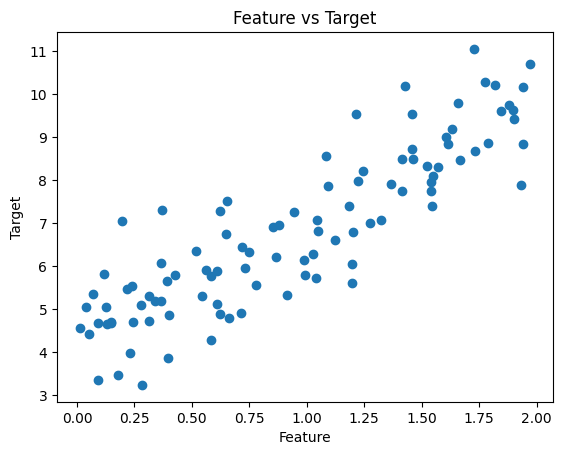

In [4]:
plt.scatter(data['Feature'], data['Target']) # Esta função cria um gráfico de dispersão.
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Feature vs Target')
plt.show()

## 5. Treinando o Modelo de Regressão Linear

* **Instanciação:** O código cria uma instância do modelo de Regressão Linear.

* **Treinamento:** O método fit é utilizado para treinar o modelo usando os dados da coluna Feature como entrada e a coluna Target como saída. O modelo aprende a relação entre Feature e Target ajustando seus parâmetros.

Após esse processo, o modelo de regressão linear está treinado e pode ser usado para fazer previsões ou avaliar a relação entre as variáveis.

In [5]:
model = LinearRegression()                    # Esta linha cria uma instância do modelo de Regressão Linear da biblioteca scikit-learn.
                                              # LinearRegression é uma classe que implementa o modelo de regressão linear,
                                              # uma técnica estatística para modelar a relação entre uma variável dependente (Target)
                                              # e uma ou mais variáveis independentes (Feature).

model.fit(data[['Feature']], data['Target'])  # model.fit: Este método é usado para ajustar (ou treinar) o modelo aos dados fornecidos.
                                              # Ele calcula os parâmetros do modelo, como os coeficientes da regressão, com base nos dados de entrada.

LinearRegression()

## 6. Avaliando o Modelo

Esse código é usado para avaliar o desempenho de um modelo de regressão linear, utilizando duas métricas comuns: o erro quadrático médio (MSE) e o coeficiente de determinação (R²), que mede a proporção da variabilidade na variável dependente que é explicada pelo modelo. Valores próximos a 1 indicam um bom ajuste.

In [6]:
y_pred = model.predict(data[['Feature']]) # model.predict: Este método usa o modelo treinado para fazer previsões com base nos dados fornecidos.
mse = mean_squared_error(data['Target'], y_pred) # mean_squared_error: É uma função da biblioteca scikit-learn usada para calcular o erro quadrático médio.
r2 = r2_score(data['Target'], y_pred) # r2_score: É uma função da biblioteca scikit-learn usada para calcular o coeficiente de determinação R².
print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 0.8065845639670531
R²: 0.7692735413614223


## 7. Visualizando os Resultados

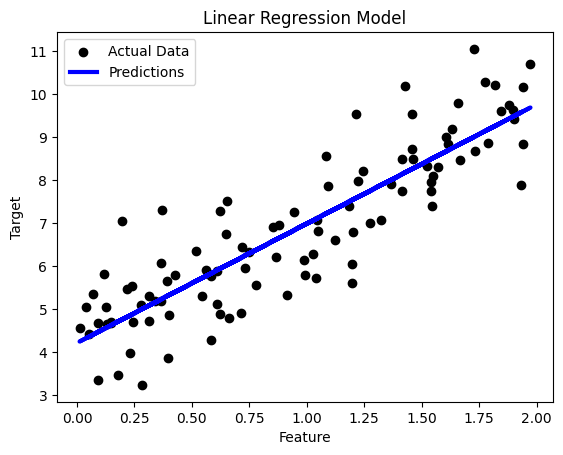

In [7]:
plt.scatter(data['Feature'], data['Target'], color='black', label='Actual Data') # plt.scatter: Cria um gráfico de dispersão
plt.plot(data['Feature'], y_pred, color='blue', linewidth=3, label='Predictions') # Adicionando uma Linha de Regressão ao Gráfico; plt.plot:
                                                                                  # Cria uma linha conectando os pontos no gráfico.
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

## 8. Conclusão
Neste notebook, criamos um conjunto de dados sintético e ajustamos um modelo de regressão linear. Avaliamos o desempenho do modelo usando MSE e R² e visualizamos os resultados. Este é um exemplo básico para demonstrar os fundamentos da regressão linear.